## 1 Exercise: Generate random data
### The idea is to learn how to generate random data following a gaussian distribution with different variances. Moreover we will generate a specific outlier in order to study how it affects a linear regression assuming different metrics.

[2.29494428 2.54253686 2.89043619 2.48105408 2.96124576 2.59576337
 2.08965032 2.70127668 2.28218788 2.55152426 2.17984134 2.74168012
 2.5168626  2.01715547 2.94090041 2.69965196 2.52546    2.32484101
 2.55566445 5.        ]


(array([2., 1., 2., 1., 1., 6., 2., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.01715547, 2.11658362, 2.21601177, 2.31543992, 2.41486807,
        2.51429623, 2.61372438, 2.71315253, 2.81258068, 2.91200883,
        3.01143698, 3.11086513, 3.21029328, 3.30972143, 3.40914958,
        3.50857774, 3.60800589, 3.70743404, 3.80686219, 3.90629034,
        4.00571849, 4.10514664, 4.20457479, 4.30400294, 4.40343109,
        4.50285925, 4.6022874 , 4.70171555, 4.8011437 , 4.90057185,
        5.        ]),
 <BarContainer object of 30 artists>)

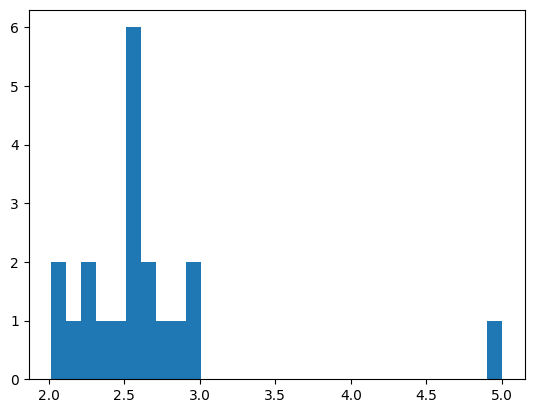

In [1]:
# 1) Generate an array array (with length=20) of standard deviations of random values following a uniform distribution 
# between 2 and 3. Fix the value of the last element = 5. The last point will be the outlier.

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.spatial import distance

std_array = np.random.uniform(2, 3, 20)
std_array[-1] = 5
print(std_array)

plt.hist(std_array, bins=30)

In [2]:
#2) Generate an array, std-array, of 20 values following a gaussian distribution with a standard deviation defined 
# by the array generated in the previous 1). Replace the last point by a value correponding to +2.5 \sigma (you have the outlier generation).

sta_gaussian_array = np.random.normal(0, std_array)
sta_gaussian_array[-1] = 2.5 * std_array[-1]

print(sta_gaussian_array)

[ 1.55954844e+00 -5.10588755e-03 -4.97036961e-01  4.06181837e+00
  8.26742646e-01 -2.64961858e+00 -6.42296763e-01 -2.80005877e+00
  1.17934445e+00  4.10338029e-02 -2.26729928e+00  2.97746906e+00
  4.08599064e+00  2.65147414e+00 -2.23781347e+00  2.07545175e+00
 -6.37958886e-01 -5.49521344e-01  2.95091922e+00  1.25000000e+01]


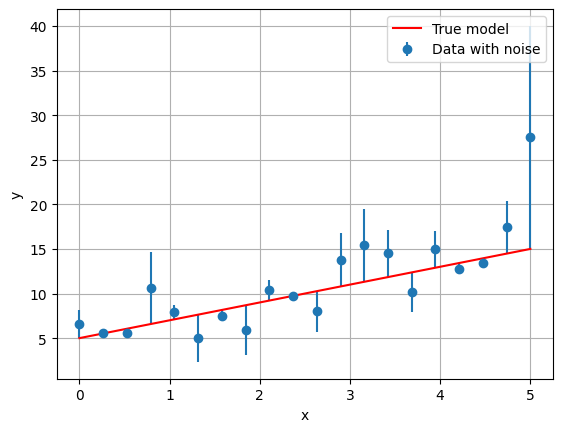

In [3]:
# 3) Generate an array of 20 values linearly spaced between 0 and 5 (your x-array)
x_array = np.linspace(0, 5, 20)


# 4) Generate the y-array to follow the relation y= a + bx + noise, wherre a=2, b=5 and 
#  noise corresponds to the  fluctuations you have generated in 2). 


def model(x, a, b):
    return a*x + b

true_model = model(x_array, 2, 5)
y_array = true_model + sta_gaussian_array


# 5) plot the data points

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data with noise')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1.2 Use gradient descent for finding best values of a and b

In [4]:
# 6) Create a function, L1-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the absolute differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L1 metric
#distance between the y-array data points and the model for params values.


def L1_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(np.abs(model_values - y_array))


#Create a function, L2-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the square differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L2 metric
#distance between the y-array data points and the model for params values.


def L2_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum((model_values - y_array) ** 2)

# Create a function, Chi2-dist, that take in argument (params, x-array, y-array, std-array), where params will
#correspond to an array of 2 elements [a,b]. This function have to return the sum of the square differences
#between the model (params[0]*x-array + params[1]) and the y-array values, divided by the std-array at the
#square. This function is evaluating the χ2 metric distance between the y-array data points and the model  for params values.


def Chi2_dist(params, x_array, y_array, std_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(((model_values - y_array) / std_array) ** 2)

In [5]:
# 7) Using the function scipy.optimize.minimize(), fins the best fit values of a and b for the 3 metrics.


L1_fit = opt.minimize(L1_dist, x0=[0, 0], args=(x_array, y_array))

L2_fit = opt.minimize(L2_dist, x0=[0, 0], args=(x_array, y_array))

Chi2_fit = opt.minimize(Chi2_dist, x0=[0, 0], args=(x_array, y_array, std_array))


print("L1 fit parameters: a = {:.3f}, b = {:.3f}".format(L1_fit.x[0], L1_fit.x[1]))
print("L2 fit parameters: a = {:.3f}, b = {:.3f}".format(L2_fit.x[0], L2_fit.x[1]))
print("Chi2 fit parameters: a = {:.3f}, b = {:.3f}".format(Chi2_fit.x[0], Chi2_fit.x[1]))


L1 fit parameters: a = 2.567, b = 4.837
L2 fit parameters: a = 2.784, b = 4.172
Chi2 fit parameters: a = 2.331, b = 4.929


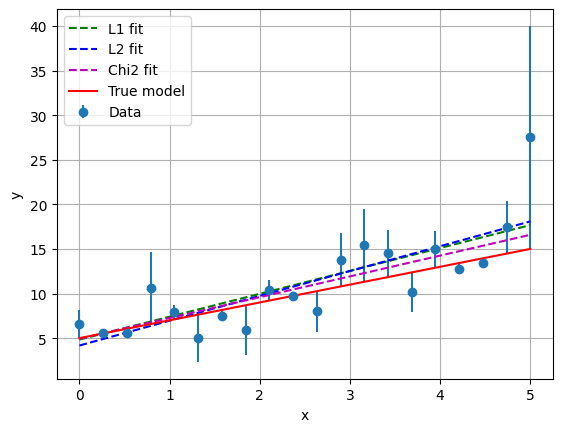

In [6]:
# 8) Do the same plot as for the question 5) adding the lines corresponding to the 3 best fits.

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data')
plt.plot(x_array, model(x_array, L1_fit.x[0], L1_fit.x[1]), 'g--', label='L1 fit')
plt.plot(x_array, model(x_array, L2_fit.x[0], L2_fit.x[1]), 'b--', label='L2 fit')
plt.plot(x_array, model(x_array, Chi2_fit.x[0], Chi2_fit.x[1]), 'm--', label='Chi2 fit')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()


### 1.3 Systematic effects
#### The goal here is to use the previous questions to stuy the systematic effect of outliers on the best fit evaluation using different metrics.

In [7]:
# 9) Create a function, get-points(), that generate automatically the 20 data points following exactly the same
#std-array you already defined in 2) and conserving the outlier value +2.5 σ for the last noise term.

def get_points():
    std_array = np.random.uniform(2, 3, 20)
    std_array[-1] = 5
    sta_gaussian_array = np.random.normal(0, std_array)
    sta_gaussian_array[-1] = 2.5 * std_array[-1]
    x_array = np.linspace(0, 5, 20)
    true_model = model(x_array, 2, 5)
    y_array = true_model + sta_gaussian_array
    return x_array, y_array, std_array

# 10) Generate 1000 samples of these 20 values, and apply the 3 metrics best-fit estimations as done in 6), 6-bis)
# and 6-ter). Save the 1000 results of best (a, b) values for the 3 metrics.
n_samples = 1000
L1_results = []
L2_results = []
Chi2_results = []
for _ in range(n_samples):
    x_array, y_array, std_array = get_points()
    L1_fit = opt.minimize(L1_dist, x0=[0, 0], args=(x_array, y_array))
    L2_fit = opt.minimize(L2_dist, x0=[0, 0], args=(x_array, y_array))
    Chi2_fit = opt.minimize(Chi2_dist, x0=[0, 0], args=(x_array, y_array, std_array))
    L1_results.append(L1_fit.x)
    L2_results.append(L2_fit.x)
    Chi2_results.append(Chi2_fit.x)

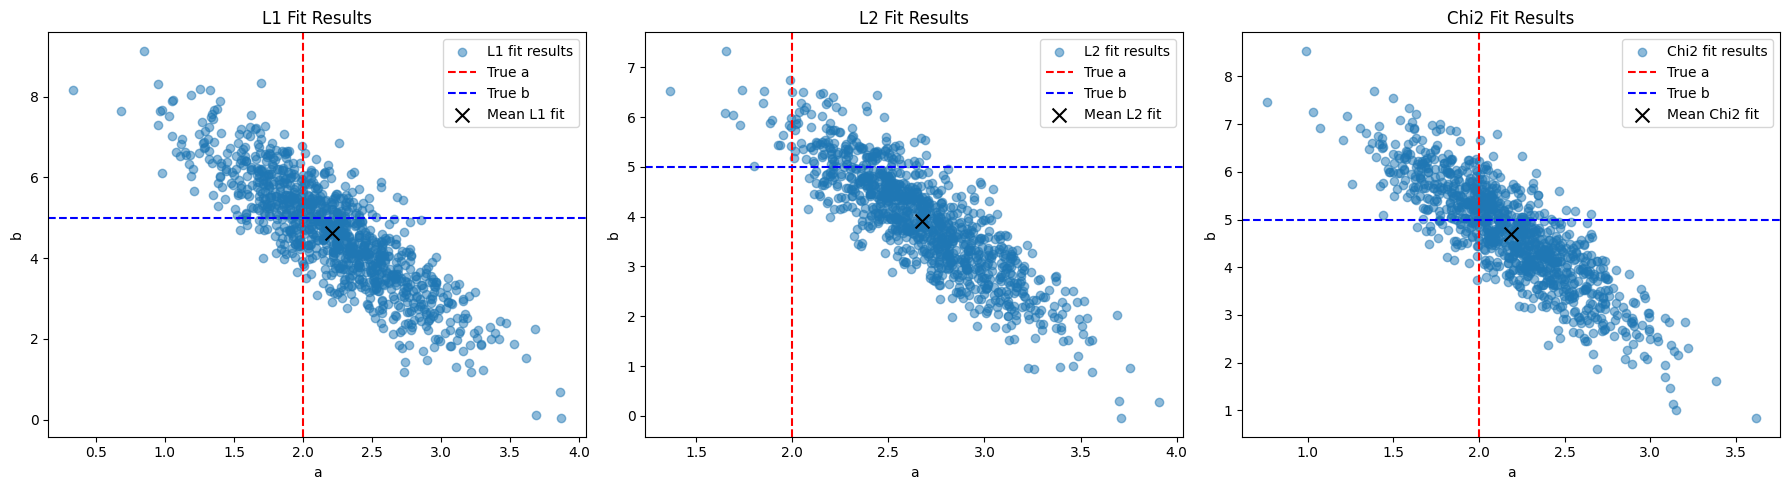

In [8]:
# 11) For the 3 metrics, make a scatter plot of the 1000 values of a and b best-fit values obtianed (So a Vs
# b). Overplot 2 lines that represents the real values of the a and b parameters you used for generating the
# random data points. Represents in each of the 3 plots, the mean value of (a, b).


L1_results = np.array(L1_results)
L2_results = np.array(L2_results)
Chi2_results = np.array(Chi2_results)   
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(L1_results[:, 0], L1_results[:, 1], alpha=0.5, label='L1 fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axhline(5, color='b', linestyle='--', label='True b')
plt.scatter(np.mean(L1_results[:, 0]), np.mean(L1_results[:, 1]), color='k', marker='x', s=100, label='Mean L1 fit')
plt.xlabel('a')
plt.ylabel('b')
plt.title('L1 Fit Results')
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(L2_results[:, 0], L2_results[:, 1], alpha=0.5, label='L2 fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axhline(5, color='b', linestyle='--', label='True b')
plt.scatter(np.mean(L2_results[:, 0]), np.mean(L2_results[:, 1]), color='k', marker='x', s=100, label='Mean L2 fit')
plt.xlabel('a')
plt.ylabel('b')
plt.title('L2 Fit Results')
plt.legend()
plt.subplot(1, 3, 3)        
plt.scatter(Chi2_results[:, 0], Chi2_results[:, 1], alpha=0.5, label='Chi2 fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axhline(5, color='b', linestyle='--', label='True b')
plt.scatter(np.mean(Chi2_results[:, 0]), np.mean(Chi2_results[:, 1]), color='k', marker='x', s=100, label='Mean Chi2 fit')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Chi2 Fit Results')
plt.legend()
plt.tight_layout()
plt.show()

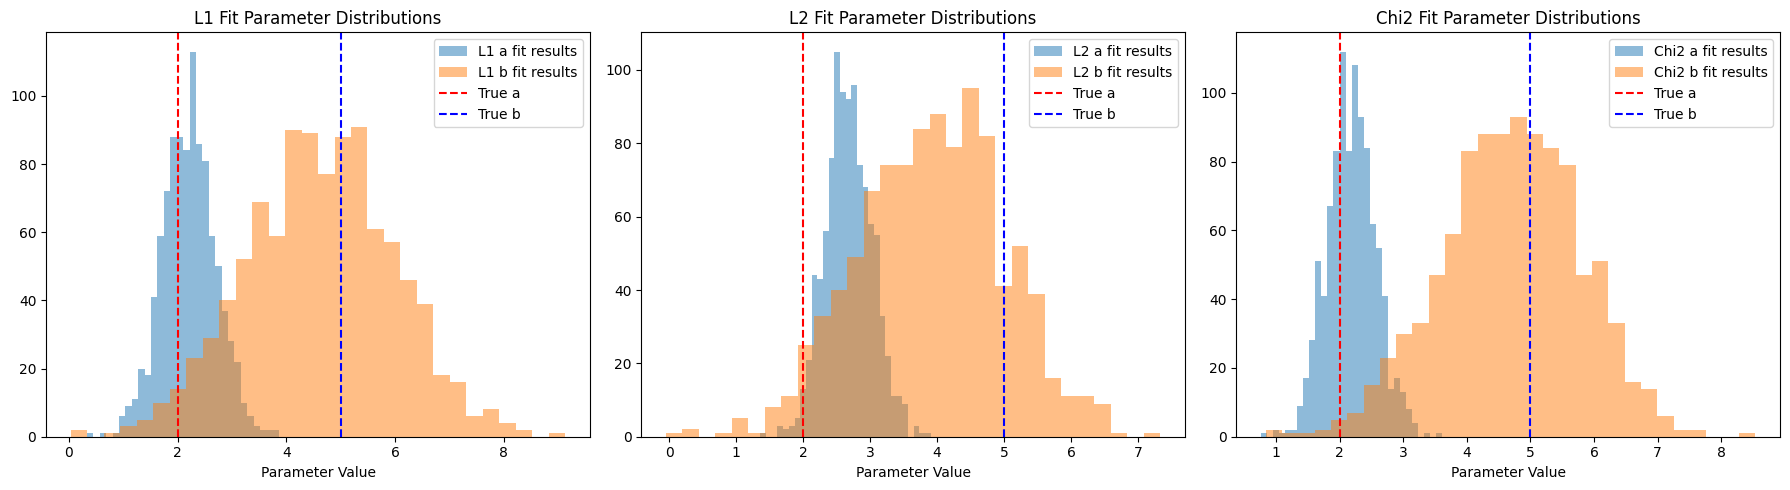

In [9]:
#extra: histograms of the best fit values for a and b for the 3 metrics, and overplot the true values of a and b as vertical lines.

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(L1_results[:, 0], bins=30, alpha=0.5, label='L1 a fit results')
plt.hist(L1_results[:, 1], bins=30, alpha=0.5, label='L1 b fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axvline(5, color='b', linestyle='--', label='True b')
plt.xlabel('Parameter Value')
plt.title('L1 Fit Parameter Distributions')
plt.legend()
plt.subplot(1, 3, 2)
plt.hist(L2_results[:, 0], bins=30, alpha=0.5, label='L2 a fit results')
plt.hist(L2_results[:, 1], bins=30, alpha=0.5, label='L2 b fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axvline(5, color='b', linestyle='--', label='True b')
plt.xlabel('Parameter Value')
plt.title('L2 Fit Parameter Distributions')
plt.legend()
plt.subplot(1, 3, 3)
plt.hist(Chi2_results[:, 0], bins=30, alpha=0.5, label='Chi2 a fit results')
plt.hist(Chi2_results[:, 1], bins=30, alpha=0.5, label='Chi2 b fit results')
plt.axvline(2, color='r', linestyle='--', label='True a')
plt.axvline(5, color='b', linestyle='--', label='True b')
plt.xlabel('Parameter Value')
plt.title('Chi2 Fit Parameter Distributions')       
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
## 12) You can define the bias of the estimation of a parameter as bias(q) = <q_i − q>_i/std(q_i)
L1_a_bias = np.mean(L1_results[:, 0] - 2) / np.std(L1_results[:, 0])
L1_b_bias = np.mean(L1_results[:, 1] - 5) / np.std(L1_results[:, 1])
L2_a_bias = np.mean(L2_results[:, 0] - 2) / np.std(L2_results[:, 0])
L2_b_bias = np.mean(L2_results[:, 1] - 5) / np.std(L2_results[:, 1])
Chi2_a_bias = np.mean(Chi2_results[:, 0] - 2) / np.std(Chi2_results[:, 0])
Chi2_b_bias = np.mean(Chi2_results[:, 1] - 5) / np.std(Chi2_results[:, 1])  


print("L1 bias: a = {:.3f}, b = {:.3f}".format(L1_a_bias, L1_b_bias))
print("L2 bias: a = {:.3f}, b = {:.3f}".format(L2_a_bias, L2_b_bias))
print("Chi2 bias: a = {:.3f}, b = {:.3f}".format(Chi2_a_bias, Chi2_b_bias))


L1 bias: a = 0.433, b = -0.276
L2 bias: a = 1.941, b = -0.995
Chi2 bias: a = 0.493, b = -0.283


#### With the above resutls, we can notice that the best fists are by L1 and Chi2 type, and the worst one is the L2 metrics. So, if we already know the error/noise, the chi2 type metric is the correct way to measure the distance between data our model, however, if we don't know the errors/noise, the L1 works really well and indeed presents the best performance, due it is unsensible to outlier points. The chi2 is the improved version of the L2 and captures the error of the measure but it is still more sensible to outliers than L1. 

Metric          | Bias a     | Bias b    
----------------------------------------
chebyshev       |    7.395 |   -4.020
mahalanobis     |    0.510 |   -0.274
cityblock       |    0.420 |   -0.237
euclidean       |    2.018 |   -1.031


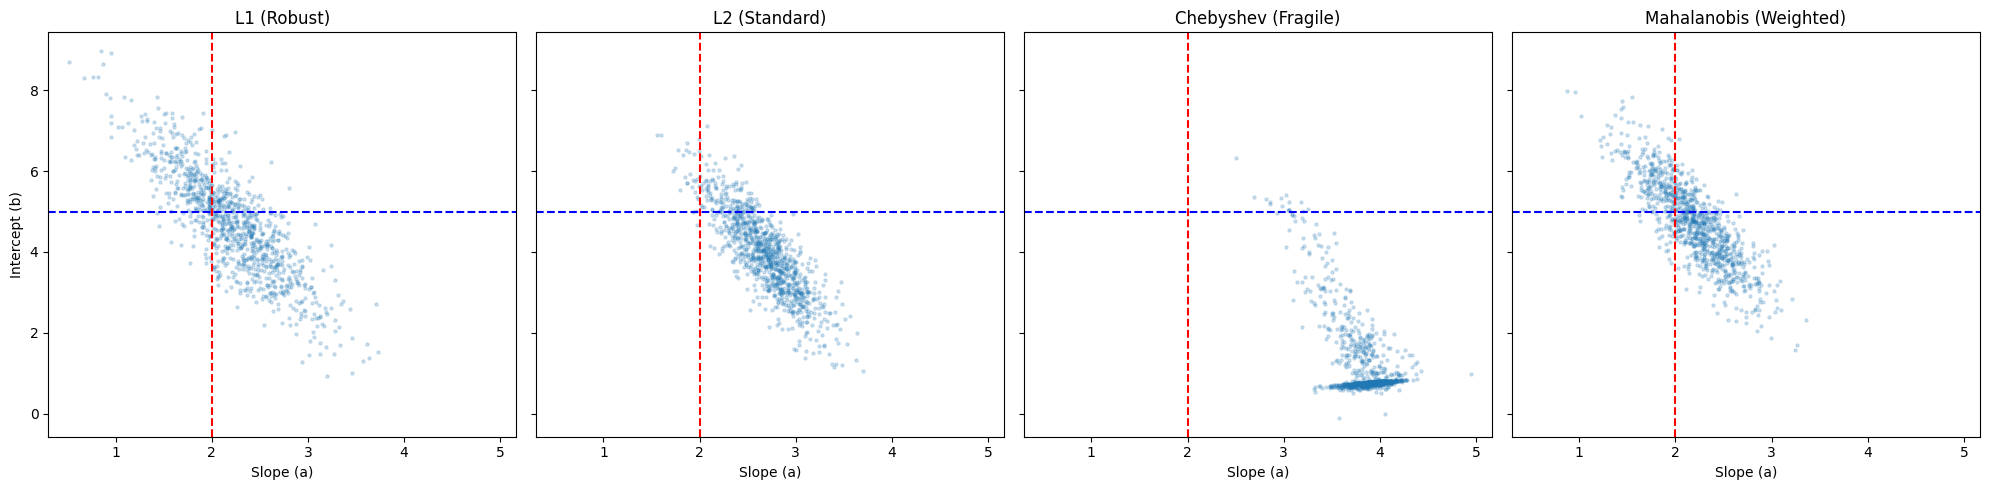

In [11]:

def fit_chebyshev(params, x, y):
    # Minimizes the maximum error
    return distance.chebyshev(model(x, *params), y)

def fit_mahalanobis(params, x, y, std):
    # S_inv is diagonal for independent noise
    S_inv = np.diag(1.0 / (std**2))
    diff = model(x, *params) - y
    # Mahalanobis D = sqrt(diff.T * S_inv * diff)
    return np.sqrt(diff.T @ S_inv @ diff)


results = {"chebyshev": [], "mahalanobis": [], "cityblock": [], "euclidean": []}

for _ in range(n_samples):
    x, y, std = get_points()
    
    res_cb = opt.minimize(lambda p: distance.cityblock(model(x, *p), y), x0=[0,0])
    res_eu = opt.minimize(lambda p: distance.euclidean(model(x, *p), y), x0=[0,0])
    

    res_ch = opt.minimize(fit_chebyshev, x0=[0, 0], args=(x, y))
    res_ma = opt.minimize(fit_mahalanobis, x0=[0, 0], args=(x, y, std))
    
    results["cityblock"].append(res_cb.x)
    results["euclidean"].append(res_eu.x)
    results["chebyshev"].append(res_ch.x)
    results["mahalanobis"].append(res_ma.x)


for key in results: results[key] = np.array(results[key])


true_a, true_b = 2, 5
print(f"{'Metric':<15} | {'Bias a':<10} | {'Bias b':<10}")
print("-" * 40)
for key in results:
    # bias(q) = <q_i - q> / std(q_i)
    bias_a = np.mean(results[key][:, 0] - true_a) / np.std(results[key][:, 0])
    bias_b = np.mean(results[key][:, 1] - true_b) / np.std(results[key][:, 1])
    print(f"{key:<15} | {bias_a:>8.3f} | {bias_b:>8.3f}")


fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
metrics = ["cityblock", "euclidean", "chebyshev", "mahalanobis"]
titles = ["L1 (Robust)", "L2 (Standard)", "Chebyshev (Fragile)", "Mahalanobis (Weighted)"]

for ax, title, m in zip(axes, titles, metrics):
    ax.scatter(results[m][:, 0], results[m][:, 1], alpha=0.2, s=5)
    ax.axvline(true_a, color='r', linestyle='--')
    ax.axhline(true_b, color='b', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Slope (a)')
    if m == "cityblock": ax.set_ylabel('Intercept (b)')

plt.tight_layout()
plt.show()

In [12]:
results = {"cityblock": [], "euclidean": [], "chebyshev": [], "mahalanobis": []}

for _ in range(n_samples):
    x, y, std = get_points()
    
    res_cb = opt.minimize(lambda p: distance.cityblock(model(x, *p), y), x0=[0,0])
    res_eu = opt.minimize(lambda p: distance.euclidean(model(x, *p), y), x0=[0,0])
    res_ch = opt.minimize(lambda p: distance.chebyshev(model(x, *p), y), x0=[0,0])
    res_ma = opt.minimize(lambda p: distance.seuclidean(model(x, *p), y, std**2), x0=[0,0])
    
    results["cityblock"].append(res_cb.x)
    results["euclidean"].append(res_eu.x)
    results["chebyshev"].append(res_ch.x)
    results["mahalanobis"].append(res_ma.x)

true_vals = np.array([2, 5])
print(f"{'Metric':<15} | {'Bias (a)':<10} | {'Var (a)':<10} | {'Bias (b)':<10} | {'Var (b)':<10}")
print("-" * 70)

for key in results:
    data = np.array(results[key])
    

    bias_a = np.mean(data[:, 0] - true_vals[0]) / np.std(data[:, 0])
    bias_b = np.mean(data[:, 1] - true_vals[1]) / np.std(data[:, 1])

    var_a = np.var(data[:, 0])
    var_b = np.var(data[:, 1])
    
    print(f"{key:<15} | {bias_a:>10.3f} | {var_a:>10.3f} | {bias_b:>10.3f} | {var_b:>10.3f}")

Metric          | Bias (a)   | Var (a)    | Bias (b)   | Var (b)   
----------------------------------------------------------------------
cityblock       |      0.440 |      0.244 |     -0.277 |      1.769
euclidean       |      1.987 |      0.119 |     -1.034 |      1.115
chebyshev       |      7.332 |      0.063 |     -4.038 |      0.887
mahalanobis     |      0.518 |      0.143 |     -0.297 |      1.135
